In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

#Nate shared this list as his ultimate go-to during our regresssion hack-a-thon

In [2]:
df_ames_train = pd.read_csv('./datasets/train.csv')

In [3]:
df_ames_train[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt',
'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Lot Frontage',
'Open Porch SF', 'Wood Deck SF', 'Lot Area', 'SalePrice']]

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,Garage Yr Blt,Mas Vnr Area,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,Lot Frontage,Open Porch SF,Wood Deck SF,Lot Area,SalePrice
0,6,1479,475.0,2.0,725.0,725,1976,2005,2,1976.0,289.0,6,0,533.0,NaN,44,0,13517,130500
1,7,2122,559.0,2.0,913.0,913,1996,1997,2,1997.0,132.0,8,1,637.0,43.0,74,0,11492,220000
2,5,1057,246.0,1.0,1057.0,1057,1953,2007,1,1953.0,0.0,5,0,731.0,68.0,52,0,7922,109000
3,5,1444,400.0,2.0,384.0,744,2006,2007,2,2007.0,0.0,7,0,0.0,73.0,0,100,9802,174000
4,6,1445,484.0,2.0,676.0,831,1900,1993,2,1957.0,0.0,6,0,0.0,82.0,59,0,14235,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,8,1728,520.0,2.0,1884.0,1728,2007,2007,2,2007.0,0.0,7,1,1011.0,79.0,276,0,11449,298751
2047,4,861,539.0,2.0,861.0,861,1940,1950,1,1961.0,0.0,4,0,262.0,NaN,0,158,12342,82500
2048,6,1913,342.0,2.0,896.0,1172,1928,1950,1,1929.0,0.0,9,1,0.0,57.0,0,0,7558,177000
2049,4,1200,294.0,1.0,1200.0,1200,1956,1956,1,1956.0,0.0,6,2,155.0,80.0,189,0,10400,144000


In [4]:
df_ames_tr_1st5 =df_ames_train[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars',
'Total Bsmt SF', 'SalePrice']]
df_ames_tr_2nd5 =df_ames_train[['1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'SalePrice']]
df_ames_tr_3rd5 =df_ames_train[['Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Lot Frontage', 'SalePrice']]
df_ames_tr_4th5 =df_ames_train[['Open Porch SF', 'Wood Deck SF', 'Lot Area', 'SalePrice']]

I know I need to split my data into train/test before I do any data transformations and build any models.

In [5]:
df_ames_ridge_train = df_ames_train[['Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1',
'Open Porch SF', 'Wood Deck SF', 'Lot Area', 'SalePrice']]

In [6]:
df_ames_ridge_train.isna().sum()

Gr Liv Area       0
Garage Cars       1
Total Bsmt SF     1
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      1
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
SalePrice         0
dtype: int64

In [7]:
#I am totally okay with dropping the rows with missing data
df_ames_ridge_train.dropna(inplace=True)

C:\Users\sarah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [8]:
df_ames_ridge_train.isna().sum()

Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      0
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
SalePrice         0
dtype: int64

In [9]:

X = df_ames_ridge_train[['Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1',
'Open Porch SF', 'Wood Deck SF', 'Lot Area']]
y = df_ames_ridge_train['SalePrice']
    

In [10]:
X.shape

(2049, 13)

In [11]:
y.shape

(2049,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
pipe2 = make_pipeline(PolynomialFeatures(), StandardScaler(), Ridge())
pipe2

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [14]:
params2 = {
           'ridge__alpha': [.01, 0.1, 1, 10, 100]}

In [15]:
gs2 = GridSearchCV(pipe2, params2, n_jobs=-1)

In [16]:
gs2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1, param_grid={'ridge__alpha': [0.01, 0.1, 1, 10, 100]})

In [17]:
pd.DataFrame(gs2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018031,0.002635,0.002800,0.000748,0.01,{'ridge__alpha': 0.01},0.684314,0.829855,0.824665,0.846103,0.846953,0.806378,0.061660,1
1,0.012402,0.002940,0.002401,0.000800,0.1,{'ridge__alpha': 0.1},0.671063,0.818958,0.813960,0.824185,0.834888,0.792611,0.061169,3
2,0.014204,0.005914,0.003401,0.001358,1,{'ridge__alpha': 1},0.647360,0.804454,0.791849,0.772278,0.817278,0.766644,0.061464,5
3,0.010203,0.000400,0.002802,0.000399,10,{'ridge__alpha': 10},0.668221,0.812665,0.790341,0.812461,0.826508,0.782039,0.058077,4
4,0.009629,0.000980,0.002052,0.000063,100,{'ridge__alpha': 100},0.733078,0.787973,0.792623,0.832360,0.842766,0.797760,0.038803,2


In [18]:
gs2.best_params_

{'ridge__alpha': 0.01}

In [19]:
gs2.best_estimator_.named_steps

{'polynomialfeatures': PolynomialFeatures(),
 'standardscaler': StandardScaler(),
 'ridge': Ridge(alpha=0.01)}

In [20]:
gs2.best_estimator_.named_steps['standardscaler'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37',
       'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55',
       'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64',
       'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73',
       'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82',
       'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91',
       'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100',
       'x101', 'x102', 'x103', 'x104'], dtype=object)

In [21]:
gs2.best_estimator_.named_steps['ridge'].coef_

array([ 0.00000000e+00, -2.27680086e+05, -1.47145935e+05, -2.60899520e+05,
       -4.88982180e+05, -1.49646657e+05, -6.11173509e+05, -2.61242187e+05,
       -2.35674181e+05,  5.46814966e+04, -3.77235747e+05,  4.27431491e+04,
       -6.50251811e+04, -3.58703377e+05, -7.63885517e+03,  2.07766176e+04,
       -1.31937909e+04,  2.05215681e+04, -1.16988430e+04,  2.73053028e+05,
        2.45441139e+04, -3.22637960e+04,  7.92077723e+03, -2.58107079e+04,
       -1.15964376e+03,  1.03824539e+04,  1.99428479e+03, -4.74979974e+03,
       -8.83854310e+02,  1.49047569e+04,  2.61794341e+04,  1.17047991e+05,
       -9.53013865e+03, -3.18876541e+03,  3.11452772e+03,  5.31398502e+03,
        1.48096559e+04, -2.07140658e+03,  4.38397882e+03, -1.38913164e+04,
       -2.37200075e+04,  1.86928283e+05,  9.28079044e+04, -1.46065060e+04,
        2.49685148e+04,  3.42397600e+03,  3.87650498e+04,  4.37107828e+03,
       -2.85636490e+02,  2.51532718e+04,  8.88720013e+03,  4.93271513e+05,
        7.04881233e+03,  

In [22]:
X_train.columns

Index(['Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
       'Year Built', 'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd',
       'Fireplaces', 'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF',
       'Lot Area'],
      dtype='object')

In [23]:
pd.DataFrame(zip(X_train.columns, gs2.best_estimator_.named_steps['ridge'].coef_))

,0,1
0,Gr Liv Area,0.000000
1,Garage Cars,-227680.085907
2,Total Bsmt SF,-147145.934912
3,1st Flr SF,-260899.519556
4,Year Built,-488982.179716
5,Year Remod/Add,-149646.656998
6,Full Bath,-611173.509193
7,TotRms AbvGrd,-261242.187385
8,Fireplaces,-235674.181448
9,BsmtFin SF 1,54681.496622


In [24]:
gs2.best_estimator_.named_steps['ridge'].intercept_

181876.0292968783

In [25]:
gs2.score(X_test, y_test)

0.8353112680455291

In [26]:
#Make predictions on the test set
preds = gs2.predict(X_test)

In [27]:
#Evaluate my metrics
print('Ridge Model #1: MAE:', mean_absolute_error(y_test, preds))
print('Ridge Model #1: MSE:', mean_squared_error(y_test, preds))
print('Ridge Model #1: R2:', r2_score(y_test, preds))

Ridge Model #1: MAE: 20569.70980747159
Ridge Model #1: MSE: 978267812.7281587
Ridge Model #1: R2: 0.8353112680455291


This model beats all three previous models! The Rsquared here is .8561 versus .7186 for the Lasso model,  -.0037 for the baseline model and .5667 for the linear regression model.

In [28]:
#I want to look at some graphs of my residuals
residuals = preds - y_test

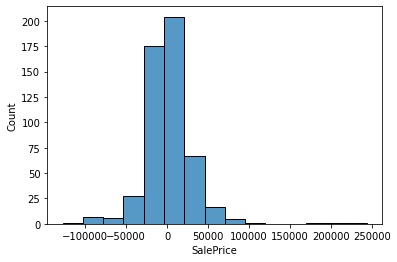

In [29]:
sns.histplot(residuals, bins=15);
#This looks like a normal distribution so this doesn't look too bad.

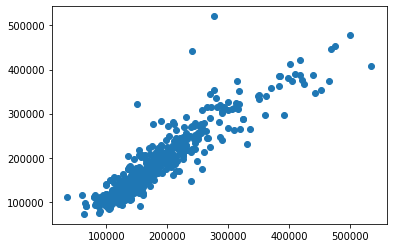

In [30]:
plt.scatter(y_test, preds);
#This doesn't look too bad!

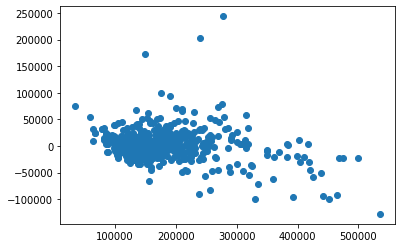

In [31]:
plt.scatter(y_test, residuals);
#That outlier at 200,000 is strange.

In [32]:
#Now, I want to use my Ridge model to score the separate test dataset so 
# that I can submit a csv file to Kaggle for the contest.

df_ames_test = pd.read_csv('./datasets/test.csv')

In [33]:
df_ames_test.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [34]:
#Pull off only the data I need
df_mini_ridge_test = df_ames_test[['Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1',
'Open Porch SF', 'Wood Deck SF', 'Lot Area']]

In [35]:
#Yay!  No missing data here!
df_mini_ridge_test.isna().sum()

Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      0
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
dtype: int64

In [36]:
df_mini_ridge_test.describe()

,Gr Liv Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,Open Porch SF,Wood Deck SF,Lot Area
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1496.914579,1.742597,1034.357631,1145.787016,1970.492027,1984.417995,1.539863,6.454442,0.618451,441.328018,47.070615,93.430524,10307.033030
std,506.468967,0.750391,413.446291,375.264111,30.395895,20.450725,0.559060,1.596632,0.669571,438.457329,68.180939,121.181702,10002.674602
min,407.000000,0.000000,0.000000,407.000000,1880.000000,1950.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1477.000000
25%,1114.000000,1.000000,789.000000,864.000000,1954.000000,1967.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,7297.250000
50%,1436.000000,2.000000,975.000000,1063.000000,1972.000000,1992.000000,2.000000,6.000000,1.000000,373.000000,27.000000,0.000000,9446.000000
75%,1779.000000,2.000000,1247.000000,1358.000000,1999.750000,2003.000000,2.000000,7.000000,1.000000,734.750000,69.750000,170.750000,11589.000000
max,4476.000000,4.000000,2630.000000,2674.000000,2010.000000,2010.000000,4.000000,12.000000,3.000000,2288.000000,742.000000,690.000000,215245.000000


In [37]:
X_mini_ridge_test = df_mini_ridge_test

In [38]:
preds_rdg_kag = gs2.predict(X_mini_ridge_test)

In [39]:
df_ames_test['SalePrice'] = preds_rdg_kag

In [40]:
df_ames_test[['Id', 'SalePrice']].to_csv('./datasets/rdg_predictions.csv', index = False)

#Used code from Chuck's Breakfast Hour Quiz3 Review

In [41]:
df_kaggle = pd.read_csv('./datasets/rdg_predictions.csv')

In [42]:
df_kaggle.head(2)

,Id,SalePrice
0,2658,124966.836167
1,2718,188605.381036
